# Star Wars Survey
The following code investigates some interesting trends using data from a Star Wars survey. The GitHub repository for the data can be found [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In [1]:
import pandas as pd
star_wars = pd.read_csv('StarWars.txt', encoding='ansi')
star_wars = star_wars[star_wars['RespondentID'].notnull()]

# Data Cleaning
## Answers to Boolean Values
"Yes" and "No" answers should be mapped to the boolean values *True* and *False* because booleans will be easier to work with than strings.

In [2]:
str_to_bool = {
    'Yes':True,
    'No':False
}

star_wars[
    'Have you seen any of the 6 films in the Star Wars franchise?'
] = star_wars[
    'Have you seen any of the 6 films in the Star Wars franchise?'
].map(str_to_bool)

star_wars[
    'Do you consider yourself to be a fan of the Star Wars film franchise?'
] = star_wars[
    'Do you consider yourself to be a fan of the Star Wars film franchise?'
].map(str_to_bool)

In [3]:
print(star_wars[
    'Have you seen any of the 6 films in the Star Wars franchise?'
].value_counts(dropna=False))

print()

print(star_wars[
    'Do you consider yourself to be a fan of the Star Wars film franchise?'
].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


## Renaming Columns
The code below renames columns describing which movies the survey respondents claim to have seen. 

"seen_1" corresponds to a respondent having seen *Star Wars: Episode I - The Phantom Menace*, "seen_2" corresponds to *Star Wars: Episode II - Attack of the Clones*, and so on.

In [4]:
# create the list of new columns
seen_cols = list()
for i in range(3,9):
    seen_cols.append('seen_' + str(i-2))

# dict() and zip() can be used to avoid having to 
# type out all of the columns we want to rename
star_wars.rename(columns=
                 dict(zip(star_wars.columns[3:9],seen_cols))
                 ,inplace=True)

print(star_wars.columns[3:9])

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')


Now we just need to convert the responses to boolean values.

In [5]:
for i in range(1,7):
    print(star_wars['seen_' + str(i)].value_counts(dropna=False))
    print()

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen_1, dtype: int64

NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: seen_2, dtype: int64

NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: seen_3, dtype: int64

Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: seen_4, dtype: int64

Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: seen_5, dtype: int64

Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: seen_6, dtype: int64



All of the columns are either the name of the movie or NaN (if the respondent hasn't seen the movie). Converting the column strings to boolean values only requires a test for null-ness.

In [6]:
for i in range(1,7):
    col_name = 'seen_' + str(i)
    star_wars[col_name] = star_wars[col_name].notnull()
    print(star_wars[col_name].value_counts(dropna=False))
    print()

True     673
False    513
Name: seen_1, dtype: int64

False    615
True     571
Name: seen_2, dtype: int64

False    636
True     550
Name: seen_3, dtype: int64

True     607
False    579
Name: seen_4, dtype: int64

True     758
False    428
Name: seen_5, dtype: int64

True     738
False    448
Name: seen_6, dtype: int64



## Cleaning Ranking Data
The next columns to clean reflect the respondent's ranking of each movie, with lower rankings being better.

The columns corresponding to each rating are similar to the ones we just cleaned ("ranking_1" refers to the same movie as "seen_1").

The following code is redundant, but that's not a huge deal for this project.

In [7]:
# create the list of new columns
ranking_cols = list()
for i in range(9,15):
    ranking_cols.append('ranking_' + str(i-8))

star_wars.rename(columns=
                 dict(zip(star_wars.columns[9:15],ranking_cols))
                 ,inplace=True)

print(star_wars.columns[9:15])

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')


In [8]:
for i in range(1,7):
    print(star_wars['ranking_' + str(i)].value_counts(dropna=False))
    print(star_wars['ranking_1'].dtype)
    print()

NaN    351
4      237
6      168
3      130
1      129
5      100
2       71
Name: ranking_1, dtype: int64
object

NaN    350
5      300
4      183
2      116
3      103
6      102
1       32
Name: ranking_2, dtype: int64
object

NaN    351
6      217
5      203
4      182
3      150
2       47
1       36
Name: ranking_3, dtype: int64
object

NaN    350
1      204
6      161
2      135
4      130
3      127
5       79
Name: ranking_4, dtype: int64
object

NaN    350
1      289
2      235
5      118
3      106
4       47
6       41
Name: ranking_5, dtype: int64
object

NaN    350
2      232
3      220
1      146
6      145
4       57
5       36
Name: ranking_6, dtype: int64
object



The ranking columns only need a simple conversion to float types.

In [9]:
for i in range(1,7):
    star_wars['ranking_' + str(i)] = star_wars['ranking_' + str(i)].astype(float)
    print(star_wars['ranking_' + str(i)].dtype)

float64
float64
float64
float64
float64
float64


# Analysis
## Best Ranking
With the cleaned data, we can find useful trends more quickly. Let's find the best-ranked movie overall.

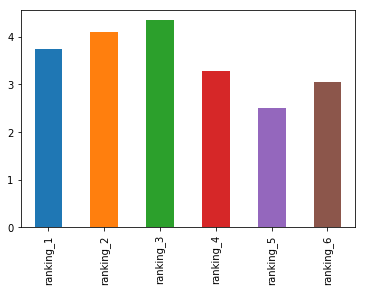

In [10]:
%matplotlib inline
means = star_wars.mean()
means['ranking_1':'ranking_6'].plot.bar()

The best-ranked movie is from *Star Wars: Episode V - The Empire Strikes Back*, which is part of the original Star Wars trilogy.

This isn't surprising because many fans of the series find the characters and bootlegged feel of the original movies more compelling than the newer ones.

## Most-Watched Movie
Finding the most-watched movie only involves a sum operation on the dataframe's relevant boolean columns.

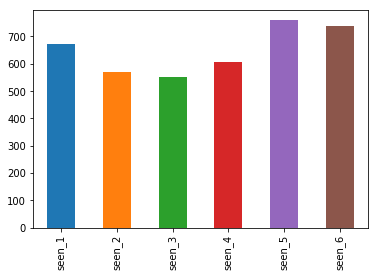

In [11]:
seen_counts = star_wars.sum()
seen_counts['seen_1':'seen_6'].plot.bar()

The most-watched movie is, not surprisingly, the highest-ranked movie: Episode V.

## Trends by Gender
Let's find out how males and females differ in their preferences of Star Wars movies.

In [12]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

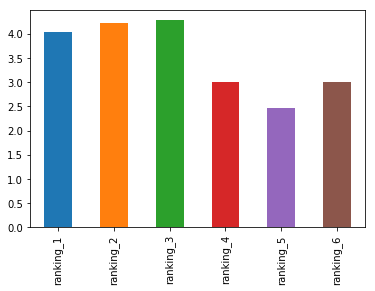

In [13]:
mmeans = males.mean()
mmeans['ranking_1':'ranking_6'].plot.bar()

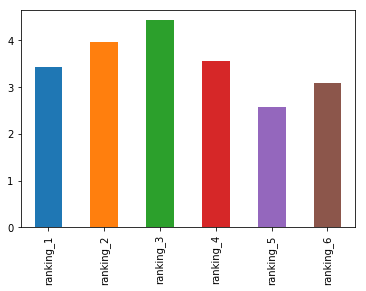

In [14]:
fmeans = females.mean()
fmeans['ranking_1':'ranking_6'].plot.bar()

The ranking trends are largely the same across genders. However, the differences in female rankings are more pronounced than the differences in male rankings.

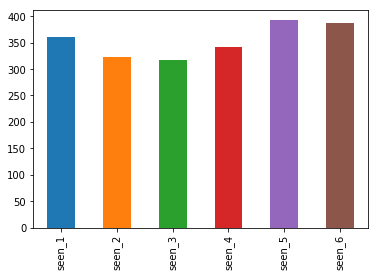

In [15]:
mseen_counts = males.sum()
mseen_counts['seen_1':'seen_6'].plot.bar()

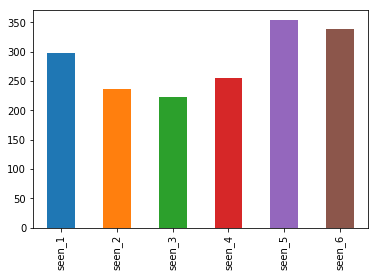

In [16]:
fseen_counts = females.sum()
fseen_counts['seen_1':'seen_6'].plot.bar()

The number of times each movie was seen again follows a similar pattern across both genders, with the general trend being more pronounced for females.

# Conclusion
That's it for now. I might come back to this project another time, but I have other things to learn, first.